In [11]:
import pandas as pd
airbnb_data = pd.read_table("C:\\Users\\user\\Documents\\rs1376240.txt")
airbnb_data

,Index,Sample ID,Call Rate,Gender,p05 Grn,p50 Grn,p95 Grn,p05 Red,p50 Red,p95 Red,...,p50 GC,Rep Error Rate,PC Error Rate,PPC Error Rate,Aux,Genotype for rs1376240,GC Score for rs1376240,Subset,Array Info.Sentrix ID,Array Info.Sentrix Position
0,1,01-01,0.816064,Unknown,312,3971,8618,794,4545,10246,...,0.792490,,,,0,AB,0.89526,NaN,207585740002,R01C01
1,2,01-02,0.991938,Unknown,325,4193,9057,650,4234,17682,...,0.812947,,,,0,BB,0.89526,NaN,207585740002,R02C01
2,3,01-03,0.991916,Unknown,359,4637,9877,713,4771,19131,...,0.812949,,,,0,AA,0.89526,NaN,207585740002,R03C01
3,4,01-07,0.992111,Unknown,381,5021,10389,775,5225,19921,...,0.812954,,,,0,BB,0.89526,NaN,207585740002,R04C01
4,5,01-12,0.991978,Unknown,375,5189,10892,724,4946,19575,...,0.813032,,,,0,BB,0.89526,NaN,207585740002,R05C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,619,08-455,0.991702,Unknown,560,6495,14354,783,3799,17755,...,0.812821,,,,0,BB,0.89526,NaN,207591070038,R08C02
619,620,08-115,0.990841,Unknown,615,7200,15757,894,3784,19493,...,0.812469,,,,0,BB,0.89526,NaN,207591070038,R09C02
620,621,08-116,0.968332,Unknown,503,3914,14191,687,1771,13818,...,0.805639,,,,0,AB,0.89526,NaN,207591070038,R10C02
621,622,08-163,0.987834,Unknown,640,6079,15853,1013,2960,18635,...,0.811300,,,,0,BB,0.89526,NaN,207591070038,R11C02


In [12]:
import pandas as pd

# Read genotype data
genotype_data = pd.read_table("C:\\Users\\user\\Documents\\rs1376240.txt")

# Read phenotype data
phenotype_data = pd.read_csv(r'C:\Users\user\Downloads\phenotypes.txt', header=None, names=["Sample ID", "Phenotype ID", "Phenotype Value"])

# Filter phenotype data for cases and controls
cases = phenotype_data[phenotype_data["Phenotype Value"] == 2.0]
controls = phenotype_data[phenotype_data["Phenotype Value"] == 1.0]

# Merge genotype data with phenotype data for cases and controls
cases_genotype = pd.merge(cases, genotype_data, left_on="Sample ID", right_on="Sample ID")
controls_genotype = pd.merge(controls, genotype_data, left_on="Sample ID", right_on="Sample ID")

# Count genotypes for cases and controls
cases_genotype_counts = cases_genotype["Genotype for rs1376240"].value_counts()
controls_genotype_counts = controls_genotype["Genotype for rs1376240"].value_counts()

print("Genotype counts for cases:")
print(cases_genotype_counts)

print("\nGenotype counts for controls:")
print(controls_genotype_counts)


Genotype counts for cases:
Genotype for rs1376240
BB    96
AB    60
AA    12
Name: count, dtype: int64

Genotype counts for controls:
Genotype for rs1376240
BB    223
AB    126
AA     35
NC      3
Name: count, dtype: int64


# Чтобы вытаскивать фенотипы 

In [7]:
import pandas as pd

# Define the paths to the files
samplesheet_path = r'D:\Genotyping\Samplesheets\597_merged_sample_sheet_0107_2024.csv'
phenotypes_path = r'C:\Users\user\Downloads\GWAS.csv'
output_file_path = r'C:\Users\user\Downloads\phenotypes.txt'

# Read sample IDs from samplesheet starting from the 12th row
samplesheet_df = pd.read_csv(samplesheet_path, header=None, skiprows=11, usecols=[0])

# Read phenotypes data
phenotypes_df = pd.read_csv(phenotypes_path)

# Rename the column of samplesheet_df
samplesheet_df.columns = ['Sample_ID']

# Merge dataframes on Sample_ID column
merged_df = pd.merge(samplesheet_df, phenotypes_df, left_on='Sample_ID', right_on='номер', how='inner')

# Select relevant columns and write to output file
merged_df[['Sample_ID', 'номер', 'Тип образца']].to_csv(output_file_path, sep=',', index=False, header=False)

print("Output file created successfully.")


Output file created successfully.


In [15]:
import pandas as pd

# Read genotype data
genotype_data = pd.read_table("C:\\Users\\user\\Documents\\rs1376240.txt")

# Read phenotype data
phenotype_data = pd.read_csv(r'C:\Users\user\Downloads\phenotypes.txt', header=None, names=["Sample ID", "Phenotype ID", "Phenotype Value"])

# Merge genotype data with phenotype data
merged_data = pd.merge(phenotype_data, genotype_data, on="Sample ID")

# Filter phenotype data for cases and controls
cases = merged_data[merged_data["Phenotype Value"] == 2.0]
controls = merged_data[merged_data["Phenotype Value"] == 1.0]

# Concatenate cases and controls
cases_controls = pd.concat([cases, controls])

# Select only required columns
cases_controls = cases_controls[["Sample ID", "Phenotype ID", "Phenotype Value"]]

# Save cases and controls together to a new file
cases_controls.to_csv("C:\\Users\\user\\Documents\\cases_controls.csv", index=False)

print("File saved successfully.")


File saved successfully.


# Extracting data for genotyped samples

In [16]:
import pandas as pd

# Read the cases_controls_combined.csv file
cases_controls = pd.read_csv("C:\\Users\\user\\Documents\\cases_controls.csv")

# Read the GWAS_new_DB.csv file
genotyped_data = pd.read_csv("C:\\Users\\user\\Downloads\\GWAS.csv")

# Merge based on Sample ID to extract data for genotyped samples
genotyped_samples_data = pd.merge(cases_controls, genotyped_data, left_on="Sample ID", right_on="номер")

# Save the extracted data to a new file
genotyped_samples_data.to_csv("C:\\Users\\user\\Documents\\genotyped_samples_data.csv", index=False)

print("Extracted data saved successfully.")


Extracted data saved successfully.


In [17]:
import os
os.listdir ("C:\\Users\\user\\Documents")

['Annual report.zip',
 'cases_controls.csv',
 'combined_data.csv',
 'Custom Office Templates',
 'Default.rdp',
 'desktop.ini',
 'genotyped_samples_data.csv',
 'Genotyping',
 'Python Scripts',
 'rs1376240.txt',
 'rs1799963.txt',
 '~$чет_годовой_2023-2024.docx',
 'Мои видеозаписи',
 'мои рисунки',
 'Моя музыка']

# Hamma mutatsiya fayllarini yigib tepdagi kodlarda yozib chiqqaningizga ichonch hosil qiling!!!

In [18]:
import pandas as pd
import os

# Step 1: Read cases_controls.csv
csv_file = 'C:\\Users\\user\\Documents\\cases_controls.csv'
df_csv = pd.read_csv(csv_file)

# Step 2: Iterate through TXT files and extract genotype information
genotype_data = {}
directory = 'C:\\Users\\user\\Documents\\'
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        rs_id = filename.split('.')[0]  # Extract rs ID from file name
        with open(os.path.join(directory, filename), 'r') as file:
            lines = file.readlines()
            genotype_index = None
            for i, line in enumerate(lines):
                if 'Genotype for ' + rs_id in line:
                    genotype_index = i
                    break
            if genotype_index is not None:
                genotype_data[rs_id] = {}
                header = lines[genotype_index].strip().split('\t')
                for line in lines[genotype_index + 1:]:
                    data = line.strip().split('\t')
                    sample_id = data[header.index('Sample ID')]
                    genotype_value = data[header.index('Genotype for ' + rs_id)]
                    genotype_data[rs_id][sample_id] = genotype_value

# Step 3: Combine phenotype and genotype information
combined_data = df_csv
for rs_id, genotype_series in genotype_data.items():
    genotype_series = pd.Series(genotype_series, name='Genotype for ' + rs_id)  # Assign a name to the series
    combined_data = pd.merge(combined_data, genotype_series, left_on='Sample ID', right_index=True)

# Step 4: Write combined data to a new CSV file
combined_data.to_csv('C:\\Users\\user\\Documents\\combined_data.csv', index=False)


In [23]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\user\\Documents\\combined_data.csv')

# Display the first few rows of the DataFrame
print(df.tail())

    Sample ID Phenotype ID  Phenotype Value Genotype for rs1376240  \
550    08-170       08-170              1.0                     AA   
551    08-115       08-115              1.0                     BB   
552    08-116       08-116              1.0                     AB   
553    08-163       08-163              1.0                     BB   
554     08-40        08-40              1.0                     BB   

    Genotype for rs1799963  
550                     BB  
551                     BB  
552                     BB  
553                     BB  
554                     AB  


# Duplikatlarni tozalab oling!

In [24]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\user\\Documents\\combined_data.csv')

# Separate data into control and case groups
control_df = df[df['Phenotype Value'] == 1.0]
case_df = df[df['Phenotype Value'] == 2.0]

# Calculate genotype counts for control and case groups
control_genotype_counts = control_df.iloc[:, 2:].apply(pd.Series.value_counts)
case_genotype_counts = case_df.iloc[:, 2:].apply(pd.Series.value_counts)

# Save output to a text file
with open('C:\\Users\\user\\Documents\\genotype_counts.csv', 'w') as f:
    f.write("Control Genotype Counts:\n")
    f.write(control_genotype_counts.to_string() + '\n\n')
    f.write("Case Genotype Counts:\n")
    f.write(case_genotype_counts.to_string() + '\n')

In [25]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\user\\Documents\\combined_data.csv', delimiter='\t')

# Display column names
print(df.columns)

Index(['Sample ID,Phenotype ID,Phenotype Value,Genotype for rs1376240,Genotype for rs1799963'], dtype='object')


  Sample ID Phenotype ID  Phenotype Value Genotype for rs1376240  \
0     01-01        01-01                2                     BB   
1     01-02        01-02                2                     BB   
2     01-26        01-26                2                     BB   
3     02-29        02-29                2                     BB   
4     02-81        02-81                2                     BB   

  Genotype for rs1799963  
0                     BB  
1                     BB  
2                     BB  
3                     BB  
4                     BB  
  Sample ID Phenotype ID  Phenotype Value  Genotype for rs1376240  \
0     01-01        01-01              NaN                     2.0   
1     01-02        01-02              NaN                     2.0   
2     01-26        01-26              NaN                     2.0   
3     02-29        02-29              NaN                     2.0   
4     02-81        02-81              NaN                     2.0   

   Genotype fo

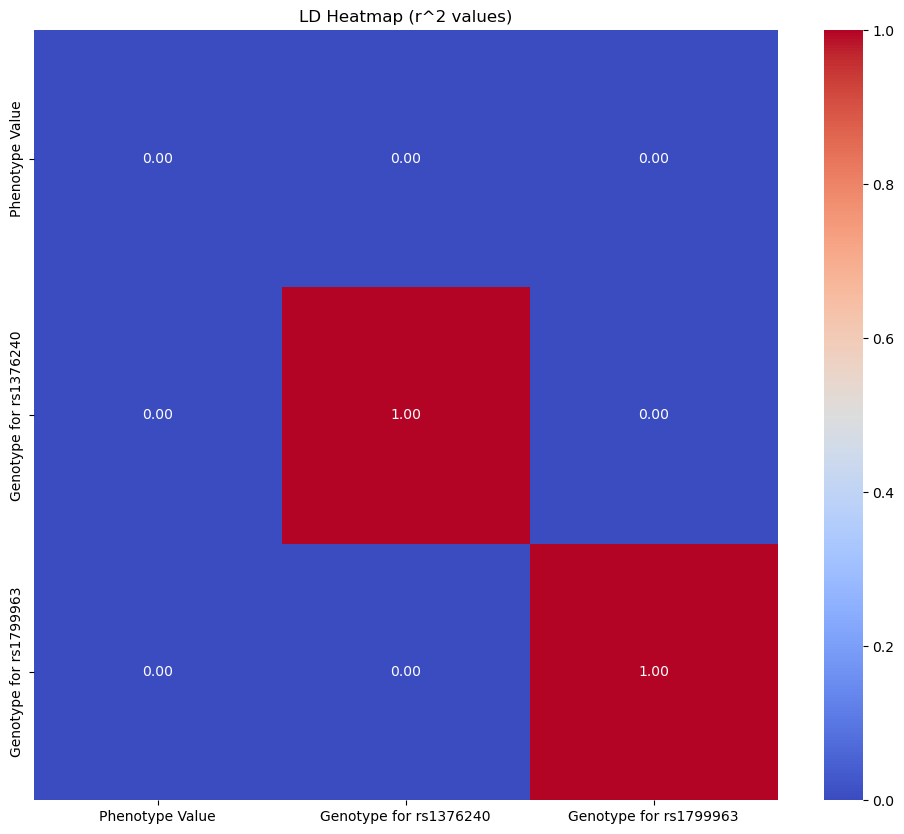

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r'C:\\Users\\user\\Documents\\combined_data.csv'
df = pd.read_csv(file_path)

# Display first few rows of the dataframe to understand its structure
print(df.head())

# Identify genotype columns
genotype_cols = df.columns[2:]  # Assuming the first two columns are 'Sample ID' and 'Phenotype Value'

# Convert genotype to numeric
def genotype_to_numeric(genotype):
    mapping = {'AA': 0, 'AB': 1, 'BB': 2, 'NC': np.nan}  # Use np.nan for missing values
    return genotype.map(mapping)

# Apply conversion to all genotype columns
for col in genotype_cols:
    df[col] = genotype_to_numeric(df[col])

# Display the dataframe to check conversion
print(df.head())

# Calculate LD
def calculate_ld(genotypes):
    n, m = genotypes.shape
    ld_matrix = np.zeros((m, m))

    for i in range(m):
        for j in range(m):
            if i <= j:
                g1 = genotypes[:, i]
                g2 = genotypes[:, j]

                # Filter out missing values
                valid_indices = ~np.isnan(g1) & ~np.isnan(g2)
                g1 = g1[valid_indices]
                g2 = g2[valid_indices]

                if len(g1) > 1 and len(g2) > 1:
                    r = np.corrcoef(g1, g2)[0, 1]
                    ld_matrix[i, j] = r ** 2
                    ld_matrix[j, i] = ld_matrix[i, j]
    return ld_matrix

# Extract genotypes as numpy array
genotypes = df[genotype_cols].to_numpy()

# Calculate LD matrix
ld_matrix = calculate_ld(genotypes)

# Print LD matrix to check
print(ld_matrix)

# Visualize LD heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(ld_matrix, xticklabels=genotype_cols, yticklabels=genotype_cols, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('LD Heatmap (r^2 values)')
plt.show()


  Sample ID Phenotype ID  Phenotype Value Genotype for rs1376240  \
0     01-01        01-01                2                     BB   
1     01-02        01-02                2                     BB   
2     01-26        01-26                2                     BB   
3     02-29        02-29                2                     BB   
4     02-81        02-81                2                     BB   

  Genotype for rs1799963  
0                     BB  
1                     BB  
2                     BB  
3                     BB  
4                     BB  
  Sample ID Phenotype ID  Phenotype Value  Genotype for rs1376240  \
0     01-01        01-01              NaN                     2.0   
1     01-02        01-02              NaN                     2.0   
2     01-26        01-26              NaN                     2.0   
3     02-29        02-29              NaN                     2.0   
4     02-81        02-81              NaN                     2.0   

   Genotype fo

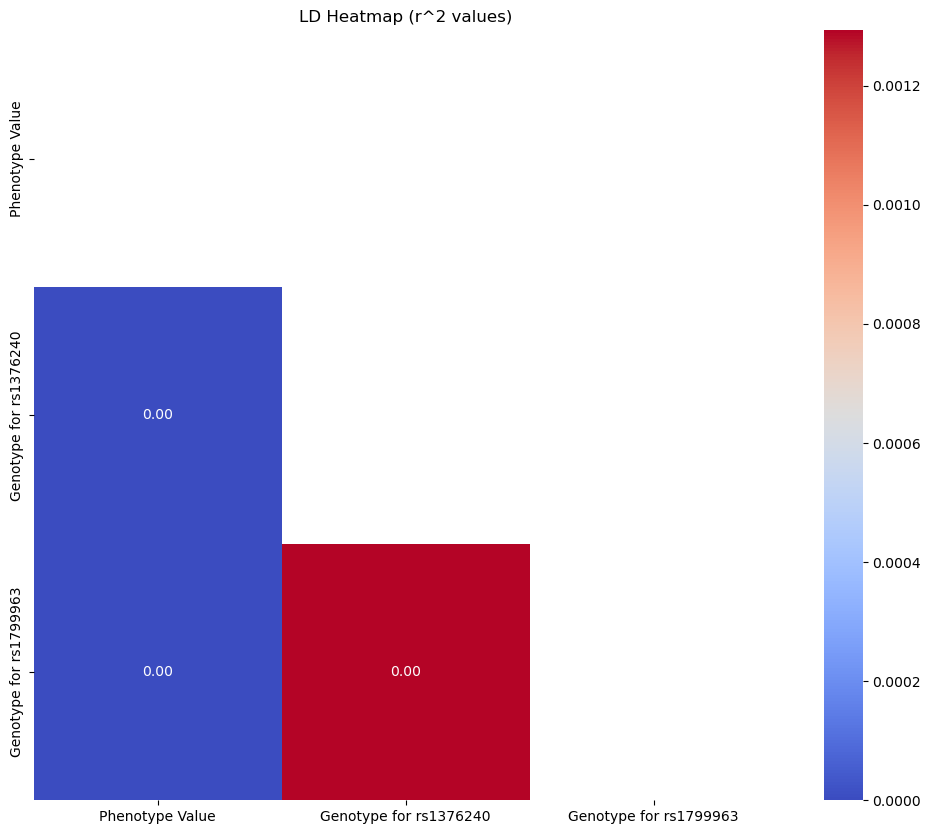

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r'C:\\Users\\user\\Documents\\combined_data.csv'
df = pd.read_csv(file_path)

# Display first few rows of the dataframe to understand its structure
print(df.head())

# Identify genotype columns
genotype_cols = df.columns[2:]  # Assuming the first two columns are 'Sample ID' and 'Phenotype Value'

# Convert genotype to numeric
def genotype_to_numeric(genotype):
    mapping = {'AA': 0, 'AB': 1, 'BB': 2, 'NC': np.nan}  # Use np.nan for missing values
    return genotype.map(mapping)

# Apply conversion to all genotype columns
for col in genotype_cols:
    df[col] = genotype_to_numeric(df[col])

# Display the dataframe to check conversion
print(df.head())

# Calculate LD
def calculate_ld(genotypes):
    n, m = genotypes.shape
    ld_matrix = np.zeros((m, m))

    for i in range(m):
        for j in range(m):
            if i <= j:
                g1 = genotypes[:, i]
                g2 = genotypes[:, j]

                # Filter out missing values
                valid_indices = ~np.isnan(g1) & ~np.isnan(g2)
                g1 = g1[valid_indices]
                g2 = g2[valid_indices]

                if len(g1) > 1 and len(g2) > 1:
                    r = np.corrcoef(g1, g2)[0, 1]
                    ld_matrix[i, j] = r ** 2
                    ld_matrix[j, i] = ld_matrix[i, j]
    return ld_matrix

# Extract genotypes as numpy array
genotypes = df[genotype_cols].to_numpy()

# Calculate LD matrix
ld_matrix = calculate_ld(genotypes)

# Print LD matrix to check
print(ld_matrix)

# Visualize LD heatmap (only lower triangular part)
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(ld_matrix, dtype=bool))  # Create a mask for the upper triangle
sns.heatmap(ld_matrix, mask=mask, xticklabels=genotype_cols, yticklabels=genotype_cols, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('LD Heatmap (r^2 values)')
plt.show()



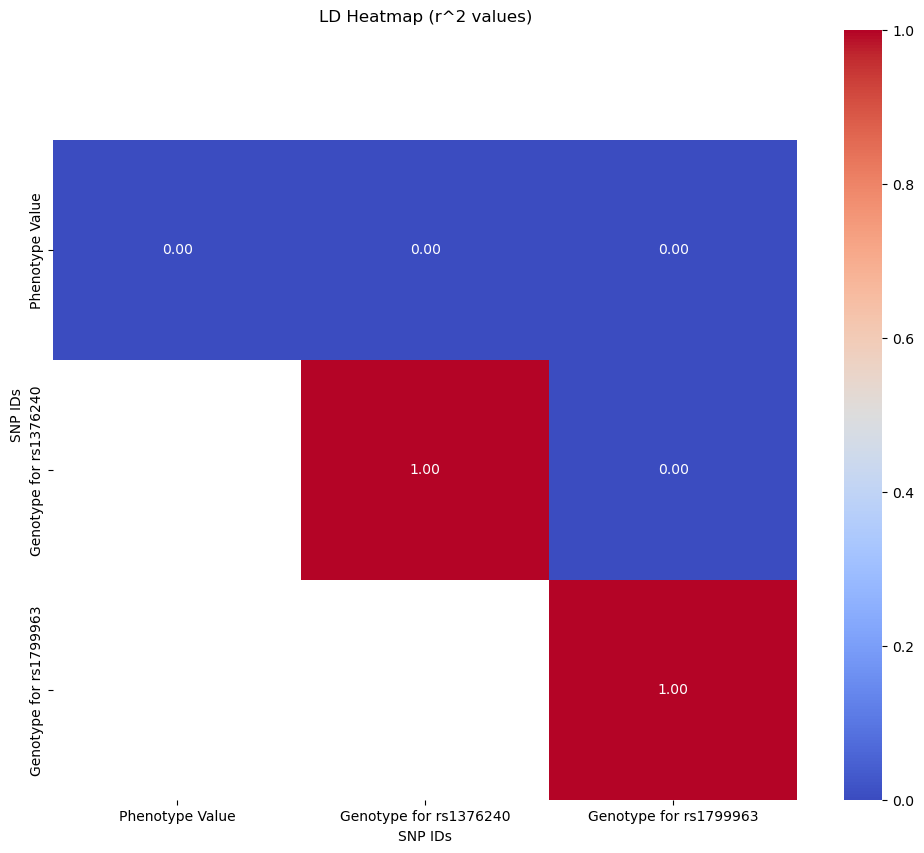

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ld_matrix is your LD matrix and genotype_cols are your SNP IDs

# Create a triangular mask to display only the lower triangular part of the LD matrix
mask = np.tri(len(ld_matrix), k=-1)

# Visualize LD heatmap in triangular format
plt.figure(figsize=(12, 10))
sns.heatmap(ld_matrix, mask=mask, xticklabels=genotype_cols, yticklabels=genotype_cols, cmap='coolwarm', annot=True, fmt=".2f")
plt.gca().set_ylim(len(ld_matrix), -0.5)  # Reverse the y-axis to start from the bottom
plt.xlabel('SNP IDs')
plt.ylabel('SNP IDs')
plt.title('LD Heatmap (r^2 values)')
plt.show()
